In [23]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

np.random.seed(2)
import keras
import cv2
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, AvgPool2D
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [3]:
img_rows, img_cols = 28,28
num_classes = 10
train = pd.read_csv('./mnist-in-csv/mnist_train.csv')
train.shape

(60000, 785)

In [4]:
test = pd.read_csv('./mnist-in-csv/mnist_test.csv')
test.shape

(10000, 785)

In [5]:
img_rows, img_cols = 28,28

(60000, 785)


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

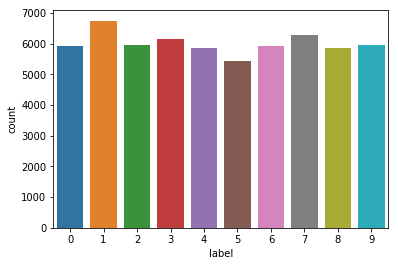

In [11]:
# train.head()
print(train.shape)
test_later = train.iloc[:18000,1:]
# train['label']
test_later.shape
# test_later = train.iloc[:,]
Y_trainValue = train['label']
X_trainValue = train.drop(labels = ["label"],axis = 1) 
g = sns.countplot(Y_trainValue)
Y_trainValue.value_counts()

In [7]:
def data_preparation(data):
    y = data.iloc[:,0]
    out_y = keras.utils.to_categorical(y, num_classes=10)
    
    x = data.iloc[:, 1:]
    numOfImages = data.shape[0]
    out_x = x.values.reshape(numOfImages, img_rows, img_cols, 1)
    out_x = out_x/255
    print(out_x.shape)
    print(out_y.shape)
    return out_x, out_y

In [15]:
x_train, y_train = data_preparation(train)

(60000, 28, 28, 1)
(60000, 10)


# Model Building

In [16]:
batch_size = 16
digitModel = Sequential()

In [17]:
digitModel.add(Conv2D(32, kernel_size=(5,5),padding='Same', activation='relu', input_shape = (img_rows, img_cols, 1)))
digitModel.add(Conv2D(32, kernel_size=(5,5),padding='Same', activation='relu'))
digitModel.add(AvgPool2D(pool_size=(2,2)))
digitModel.add(Dropout(0.25))
digitModel.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='Same'))
digitModel.add(AvgPool2D(pool_size=(2,2)))
digitModel.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='Same'))
digitModel.add(AvgPool2D(pool_size=(2,2)))
digitModel.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='Same'))
digitModel.add(AvgPool2D(pool_size=(2,2), strides=(2,2)))
digitModel.add(Dropout(0.25))


In [18]:
digitModel.add(Flatten())

In [19]:
digitModel.add(Dense(256, activation='relu'))
digitModel.add(Dropout(0.5))
digitModel.add(Dense(num_classes, activation='softmax'))

# Compile

In [20]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [21]:
digitModel.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

In [24]:
'''In order to make the optimizer converge faster and closest to the global minimum 
of the loss function, we will use an annealing method of the learning rate (LR).'''
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Fit

In [25]:
digitModel.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.25, callbacks=[learning_rate_reduction])

Train on 45000 samples, validate on 15000 samples
Epoch 1/30
45000/45000 [==============================] - 168s - loss: 0.5875 - acc: 0.8076 - val_loss: 0.1332 - val_acc: 0.9595
Epoch 2/30
45000/45000 [==============================] - 166s - loss: 0.1414 - acc: 0.9603 - val_loss: 0.1004 - val_acc: 0.9709
Epoch 3/30
45000/45000 [==============================] - 162s - loss: 0.0924 - acc: 0.9736 - val_loss: 0.0569 - val_acc: 0.9843
Epoch 4/30
45000/45000 [==============================] - 162s - loss: 0.0719 - acc: 0.9814 - val_loss: 0.0913 - val_acc: 0.9801
Epoch 5/30
45000/45000 [==============================] - 162s - loss: 0.0575 - acc: 0.9841 - val_loss: 0.0638 - val_acc: 0.9847
Epoch 6/30
45000/45000 [==============================] - 162s - loss: 0.0516 - acc: 0.9860 - val_loss: 0.0395 - val_acc: 0.9905
Epoch 7/30
45000/45000 [==============================] - 162s - loss: 0.0480 - acc: 0.9871 - val_loss: 0.0367 - val_acc: 0.9905
Epoch 8/30
45000/45000 [=======================

In [26]:
digitModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
__________

# Model Predict

In [27]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train.shape
# X_train_main = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
# X_test_main, Y_test_main = data_preparation(X_train_main)

(60000, 28, 28)

In [28]:
X_train_main = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train_main.shape

(60000, 28, 28, 1)

In [29]:
test_pred = pd.DataFrame(digitModel.predict(X_train_main, batch_size=200))

In [30]:
test_pred = pd.DataFrame(test_pred.idxmax(axis=1))

In [31]:
test_pred.index.name = 'ImageId'

In [32]:
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1


In [33]:
test_pred = test_pred.iloc[:28000,:]
test_pred.shape

(28000, 2)

In [34]:
test_pred.to_csv('mnist_submission.csv', index = False)

# Predict on Handwritten Image

In [94]:
img_pred = cv2.imread("3.jpg", 0)

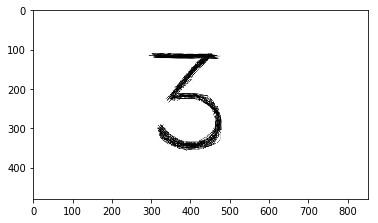

In [95]:
plt.imshow(img_pred, cmap='gray')

In [96]:
img_pred.shape

(480, 852)

In [97]:
if img_pred.shape != [28,28]:
    img = cv2.resize(img_pred, (28,28))
    img_pred = img.reshape(28,28,-1)
else:
    img_pred = img_pred.reshape(28,28,-1)
    

In [98]:
img_pred.shape

(28, 28, 1)

In [99]:
img_pred = img_pred.reshape(1,28,28,1)

In [100]:
img_pred = img_pred/255.0

In [109]:
prediction = digitModel.predict_classes(img_pred)
prediction

1/1 [==============================] - 0s


array([8])

In [106]:
prediction_probability = digitModel.predict_proba(img_pred)

1/1 [==============================] - 0s


In [103]:
pred_proba = "%.2f%%" % (prediction_probability[0][prediction]*100)
print(pred_proba)

100.00%


In [104]:
print(prediction[0], " Confidence ", pred_proba)

8  Confidence  100.00%
